<a href="https://colab.research.google.com/github/MSaintjohn/Python-201/blob/main/201_Projext_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

What are the diffences between inpatient, outpatient and emergency visits among the different age groups?

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Getting rid of unnecessary columns

In [ ]:
drop_cols = ['discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications','diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'weight']

In [ ]:
df.drop(drop_cols, inplace = True, axis=1)

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,number_outpatient,number_emergency,number_inpatient
0,2278392,8222157,Caucasian,Female,[0-10),6,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,0,0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,2,0,1
3,500364,82442376,Caucasian,Male,[30-40),1,0,0,0
4,16680,42519267,Caucasian,Male,[40-50),1,0,0,0


Set index to encounter id

In [ ]:
df['encounter_id'].is_unique

True

In [ ]:
df=df.set_index('encounter_id')

In [ ]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,number_outpatient,number_emergency,number_inpatient
encounter_id,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),6,0,0,0
149190,55629189,Caucasian,Female,[10-20),1,0,0,0
64410,86047875,AfricanAmerican,Female,[20-30),1,2,0,1
500364,82442376,Caucasian,Male,[30-40),1,0,0,0
16680,42519267,Caucasian,Male,[40-50),1,0,0,0


In [ ]:
df.groupby(['age']).describe()

patient_nbr                              ... number_inpatient           
               count          mean           std  ...              50%  75%   max
age                                               ...                            
[0-10)         161.0  2.789261e+07  3.278544e+07  ...              0.0  0.0   2.0
[10-20)        691.0  3.835759e+07  3.890952e+07  ...              0.0  1.0  11.0
[20-30)       1657.0  4.991599e+07  3.810924e+07  ...              0.0  1.0  21.0
[30-40)       3775.0  4.976364e+07  3.951630e+07  ...              0.0  1.0  14.0
[40-50)       9685.0  5.218466e+07  3.941990e+07  ...              0.0  1.0  19.0
[50-60)      17256.0  5.211858e+07  3.916083e+07  ...              0.0  1.0  14.0
[60-70)      22483.0  5.455034e+07  3.869874e+07  ...              0.0  1.0  15.0
[70-80)      26068.0  5.418932e+07  3.817089e+07  ...              0.0  1.0  13.0
[80-90)      17197.0  5.925575e+07  3.788080e+07  ...              0.0  1.0  10.0
[90-100)      2793.0  5.892333e+07  3.798221e+07  ...              0.0  1.0  10.0

[10 rows x 40 columns]

In [ ]:
df.groupby(['age'])['number_outpatient', 'number_emergency', 'number_inpatient'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,number_outpatient,number_emergency,number_inpatient
age,,,
[0-10),0.012422,0.031056,0.080745
[10-20),0.170767,0.156295,0.532562
[20-30),0.366325,0.578153,1.338564
[30-40),0.290861,0.490331,0.762649
[40-50),0.329892,0.356840,0.724109
[50-60),0.328002,0.222473,0.615090
[60-70),0.388071,0.162434,0.606147
[70-80),0.393011,0.131080,0.610365
[80-90),0.417108,0.144269,0.609118


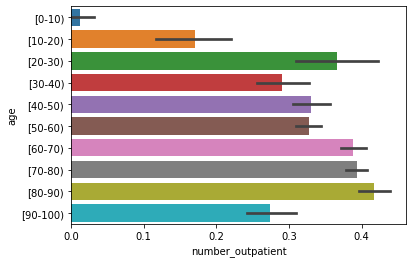

In [ ]:
sns.barplot(x='number_outpatient', y='age', data=df)

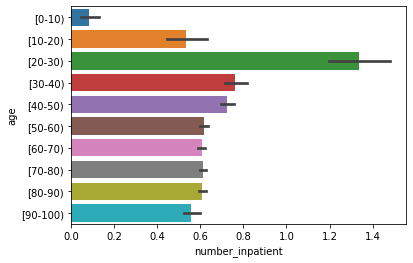

In [ ]:
sns.barplot(x='number_inpatient', y='age', data=df)

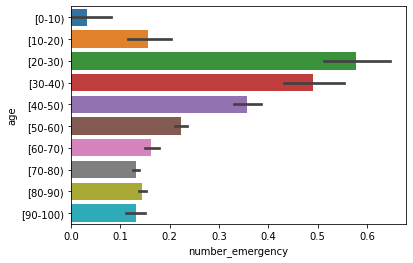

In [ ]:
sns.barplot(x='number_emergency', y='age', data= df)

Age range 20-30 had highest number of inpatient and emergency but has a high standard deviation which skews the average. It is much more likely that the older age ranges have a higher average despite what the visualization shows. 